# „Çπ„Ç≠„É£„É´„Éî„É≥„Ç∞ÈäòÊüÑÈÅ∏ÂÆö ÂÆåÂÖ®ÂàÜÊûê

## ÁõÆÁöÑ
1. ÂÖ®ÈäòÊüÑ„Çπ„ÇØ„É™„Éº„Éã„É≥„Ç∞ÁµêÊûú„ÅÆÂàÜÊûê
2. Entry/ActiveÊà¶Áï•„ÅÆÈÅ∏ÂÆö„Éë„Çø„Éº„É≥ÂàÜÊûê
3. Êó•Ë∂≥„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„Éà
4. Áõ∏Èñ¢ÂàÜÊûêÔºà„Å©„ÅÆÊåáÊ®ô„ÅåÊúâÂäπ„ÅãÔºâ
5. Top15ÈäòÊüÑ„ÅÆË©≥Á¥∞„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÔºàyfinance 5ÂàÜË∂≥Ôºâ
6. Á∑èÂêàÁµêË´ñ„ÉªÊîπÂñÑÊèêÊ°à

## „Éá„Éº„Çø„Éï„É≠„Éº
```
screened_scored.parquet (ÂÖ®ÈäòÊüÑ„ÉªÂÖ®Êó•‰ªò)
  ‚Üì
Êó•Ë∂≥ÂàÜÊûê ‚Üí Entry/Active Top15ÈÅ∏ÂÆö
  ‚Üì
yfinance 5ÂàÜË∂≥ÂèñÂæóÔºàTop15„ÅÆ„ÅøÔºâ
  ‚Üì
Ë©≥Á¥∞„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÔºàÊôÇÈñìÂ∏ØÂà•„Éë„Éï„Ç©„Éº„Éû„É≥„ÇπÔºâ
```

## 1. Áí∞Â¢ÉË®≠ÂÆö„Éª„Éá„Éº„ÇøË™≠„ÅøËæº„Åø

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Êó•Êú¨Ë™û„Éï„Ç©„É≥„ÉàË®≠ÂÆö
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Hiragino Sans', 'Yu Gothic', 'Meirio']
plt.rcParams['axes.unicode_minus'] = False

# „Éë„ÇπË®≠ÂÆö
ROOT = Path.cwd().parents[1]
TEST_DIR = ROOT / 'data' / 'parquet' / 'test'
INPUT_FILE = TEST_DIR / 'mock_screened_500stocks_scored.parquet'

print("=" * 80)
print("„Çπ„Ç≠„É£„É´„Éî„É≥„Ç∞ÈäòÊüÑÈÅ∏ÂÆö ÂÆåÂÖ®ÂàÜÊûê")
print("=" * 80)
print(f"\nÂÖ•Âäõ„Éï„Ç°„Ç§„É´: {INPUT_FILE}")
print(f"Â≠òÂú®Á¢∫Ë™ç: {INPUT_FILE.exists()}")

„Çπ„Ç≠„É£„É´„Éî„É≥„Ç∞ÈäòÊüÑÈÅ∏ÂÆö ÂÆåÂÖ®ÂàÜÊûê

ÂÖ•Âäõ„Éï„Ç°„Ç§„É´: /Users/hiroyukiyamanaka/Desktop/python_stock/dash_plotly/data/parquet/test/mock_screened_500stocks_scored.parquet
Â≠òÂú®Á¢∫Ë™ç: True


In [2]:
# „Éá„Éº„ÇøË™≠„ÅøËæº„Åø
df = pd.read_parquet(INPUT_FILE)

# Êó•‰ªòÂûãÂ§âÊèõ
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# Âü∫Êú¨ÊÉÖÂ†±Ë°®Á§∫
print(f"Á∑èË°åÊï∞: {len(df):,}")
print(f"ÈäòÊüÑÊï∞: {df['ticker'].nunique()}")
print(f"Êó•‰ªòÁØÑÂõ≤: {df['date'].min()} ÔΩû {df['date'].max()}")
print(f"Êó•Êï∞: {df['date'].nunique()}")
print(f"\n„Ç´„É©„É†: {list(df.columns)}")

df.head()

Á∑èË°åÊï∞: 19,945
ÈäòÊüÑÊï∞: 500
Êó•‰ªòÁØÑÂõ≤: 2025-08-21 00:00:00 ÔΩû 2025-10-20 00:00:00
Êó•Êï∞: 40

„Ç´„É©„É†: ['date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ticker', 'prevClose', 'change_pct', 'tr', 'atr14', 'atr14_pct', 'ma5', 'ma25', 'rsi14', 'vol_ma10', 'vol_ratio', 'overall_rating', 'stock_name', 'market', 'sectors', 'series', 'topixnewindexseries', 'entry_filter_passed', 'entry_score', 'entry_rank', 'active_filter_passed', 'active_score', 'active_rank']


date    Open    High     Low   Close     Volume  ticker  prevClose  \
0 2025-08-21  1020.0  1028.0  1009.0  1020.5  1473100.0  1332.T        NaN   
1 2025-08-22  1023.5  1031.0  1015.5  1024.0  1751500.0  1332.T     1020.5   
2 2025-08-25  1023.0  1023.0  1005.0  1008.0  1005400.0  1332.T     1024.0   
3 2025-08-26  1001.5  1003.0   990.0   992.7  1397800.0  1332.T     1008.0   
4 2025-08-27   990.0  1008.5   985.3  1002.5  1384400.0  1332.T      992.7   

   change_pct    tr  ...  market  sectors  series  topixnewindexseries  \
0         NaN  19.0  ...    „Éó„É©„Ç§„É†   Ê∞¥Áî£„ÉªËæ≤ÊûóÊ•≠      È£üÂìÅ         TOPIX Mid400   
1        0.34  15.5  ...    „Éó„É©„Ç§„É†   Ê∞¥Áî£„ÉªËæ≤ÊûóÊ•≠      È£üÂìÅ         TOPIX Mid400   
2       -1.56  19.0  ...    „Éó„É©„Ç§„É†   Ê∞¥Áî£„ÉªËæ≤ÊûóÊ•≠      È£üÂìÅ         TOPIX Mid400   
3       -1.52  18.0  ...    „Éó„É©„Ç§„É†   Ê∞¥Áî£„ÉªËæ≤ÊûóÊ•≠      È£üÂìÅ         TOPIX Mid400   
4        0.99  23.2  ...    „Éó„É©„Ç§„É†   Ê∞¥Áî£„ÉªËæ≤ÊûóÊ•≠      È£üÂìÅ         TOPIX Mid400   

   entry_filter_passed  entry_score  entry_rank active_filter_passed  \
0                False          0.0         NaN                False   
1                 True         75.0         1.0                False   
2                 True         45.0         1.0                False   
3                 True         55.0         1.0                False   
4                 True         85.0         1.0                False   

  active_score active_rank  
0          0.0         NaN  
1          0.0         NaN  
2          0.0         NaN  
3          0.0         NaN  
4          0.0         NaN  

[5 rows x 29 columns]

## 2. ÈäòÊüÑÈÅ∏ÂÆö„Éë„Çø„Éº„É≥ÂàÜÊûê

In [3]:
# Entry/ActiveÂÄôË£ú„ÅÆÊäΩÂá∫
df_entry = df[df['entry_filter_passed'] == True].copy()
df_active = df[df['active_filter_passed'] == True].copy()

print("### EntryÊà¶Áï•")
print(f"Á∑èÂÄôË£úÊï∞: {len(df_entry)}")
print(f"„É¶„Éã„Éº„ÇØÈäòÊüÑÊï∞: {df_entry['ticker'].nunique()}")
print(f"Êó•Âà•Âπ≥ÂùáÂÄôË£úÊï∞: {len(df_entry) / df_entry['date'].nunique():.1f}")

print("\n### ActiveÊà¶Áï•")
print(f"Á∑èÂÄôË£úÊï∞: {len(df_active)}")
print(f"„É¶„Éã„Éº„ÇØÈäòÊüÑÊï∞: {df_active['ticker'].nunique()}")
print(f"Êó•Âà•Âπ≥ÂùáÂÄôË£úÊï∞: {len(df_active) / df_active['date'].nunique():.1f}")

### EntryÊà¶Áï•
Á∑èÂÄôË£úÊï∞: 1196
„É¶„Éã„Éº„ÇØÈäòÊüÑÊï∞: 67
Êó•Âà•Âπ≥ÂùáÂÄôË£úÊï∞: 30.7

### ActiveÊà¶Áï•
Á∑èÂÄôË£úÊï∞: 1564
„É¶„Éã„Éº„ÇØÈäòÊüÑÊï∞: 227
Êó•Âà•Âπ≥ÂùáÂÄôË£úÊï∞: 40.1


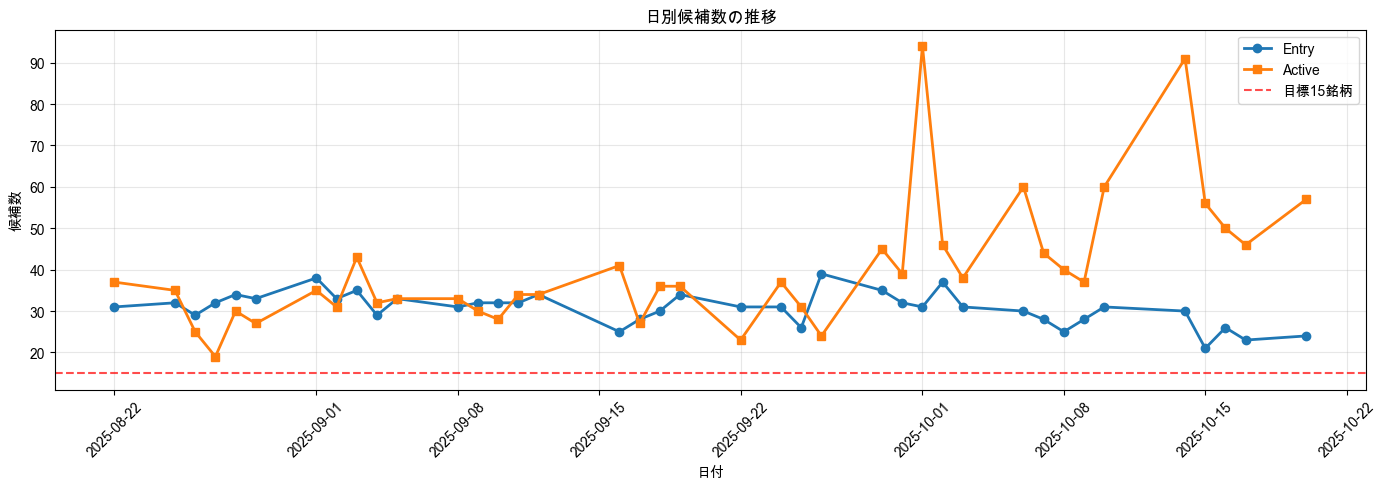


EntryÂÄôË£úÊï∞: ÊúÄÂ∞è21, ÊúÄÂ§ß39, Âπ≥Âùá30.7
ActiveÂÄôË£úÊï∞: ÊúÄÂ∞è19, ÊúÄÂ§ß94, Âπ≥Âùá40.1


In [4]:
# Êó•Âà•ÂÄôË£úÊï∞„ÅÆÊé®Áßª
entry_daily = df_entry.groupby('date').size()
active_daily = df_active.groupby('date').size()

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(entry_daily.index, entry_daily.values, marker='o', label='Entry', linewidth=2)
ax.plot(active_daily.index, active_daily.values, marker='s', label='Active', linewidth=2)
ax.axhline(y=15, color='red', linestyle='--', label='ÁõÆÊ®ô15ÈäòÊüÑ', alpha=0.7)
ax.set_xlabel('Êó•‰ªò')
ax.set_ylabel('ÂÄôË£úÊï∞')
ax.set_title('Êó•Âà•ÂÄôË£úÊï∞„ÅÆÊé®Áßª')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nEntryÂÄôË£úÊï∞: ÊúÄÂ∞è{entry_daily.min()}, ÊúÄÂ§ß{entry_daily.max()}, Âπ≥Âùá{entry_daily.mean():.1f}")
print(f"ActiveÂÄôË£úÊï∞: ÊúÄÂ∞è{active_daily.min()}, ÊúÄÂ§ß{active_daily.max()}, Âπ≥Âùá{active_daily.mean():.1f}")

In [5]:
# È†ªÂá∫ÈäòÊüÑ„ÅÆÁâπÂÆö
entry_freq = df_entry['ticker'].value_counts().head(15)
active_freq = df_active['ticker'].value_counts().head(15)

print("### EntryÊà¶Áï•: È†ªÂá∫Top15ÈäòÊüÑ")
for ticker, count in entry_freq.items():
    stock_name = df[df['ticker'] == ticker]['stock_name'].iloc[0] if 'stock_name' in df.columns else ''
    pct = count / df_entry['date'].nunique() * 100
    print(f"{ticker:6s} {stock_name:20s} {count:3d}Âõû ({pct:5.1f}%)")

print("\n### ActiveÊà¶Áï•: È†ªÂá∫Top15ÈäòÊüÑ")
for ticker, count in active_freq.items():
    stock_name = df[df['ticker'] == ticker]['stock_name'].iloc[0] if 'stock_name' in df.columns else ''
    pct = count / df_active['date'].nunique() * 100
    print(f"{ticker:6s} {stock_name:20s} {count:3d}Âõû ({pct:5.1f}%)")

### EntryÊà¶Áï•: È†ªÂá∫Top15ÈäòÊüÑ
1332.T „Éã„ÉÉ„Çπ„Ç§                  39Âõû (100.0%)
3401.T Â∏ù‰∫∫                    39Âõû (100.0%)
4095.T Êó•Êú¨„Éë„Éº„Ç´„É©„Ç§„Ç∏„É≥„Ç∞            39Âõû (100.0%)
2170.T „É™„É≥„ÇØ„Ç¢„É≥„Éâ„É¢„ÉÅ„Éô„Éº„Ç∑„Éß„É≥         39Âõû (100.0%)
9119.T È£ØÈáéÊµ∑ÈÅã                  39Âõû (100.0%)
6472.T ÔºÆÔº¥ÔºÆ                   39Âõû (100.0%)
197A.T „Çø„Ç¶„É≥„Ç∫                  38Âõû ( 97.4%)
9301.T ‰∏âËè±ÂÄâÂ∫´                  38Âõû ( 97.4%)
7241.T „Éï„Çø„ÉêÁî£Ê•≠                 38Âõû ( 97.4%)
9507.T ÂõõÂõΩÈõªÂäõ                  37Âõû ( 94.9%)
7085.T „Ç´„Éº„Éñ„Çπ„Éõ„Éº„É´„Éá„Ç£„É≥„Ç∞„Çπ          37Âõû ( 94.9%)
8714.T Ê±†Áî∞Ê≥âÂ∑û„Éõ„Éº„É´„Éá„Ç£„É≥„Ç∞„Çπ          37Âõû ( 94.9%)
7186.T Ê®™Êµú„Éï„Ç£„Éä„É≥„Ç∑„É£„É´„Ç∞„É´„Éº„Éó         37Âõû ( 94.9%)
3962.T „ÉÅ„Çß„É≥„Ç∏„Éõ„Éº„É´„Éá„Ç£„É≥„Ç∞„Çπ          36Âõû ( 92.3%)
1852.T Ê∑∫Ê≤ºÁµÑ                   36Âõû ( 92.3%)

### ActiveÊà¶Áï•: È†ªÂá∫Top15ÈäòÊüÑ
8105.T Â†ÄÁî∞‰∏∏Ê≠£                  32Âõû ( 82.1%)
2158.T

## 3. Êó•Ë∂≥„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÔºàÂÖ®ÂÄôË£úÈäòÊüÑÔºâ

In [6]:
# ÁøåÊó•„Éá„Éº„Çø„ÅÆÂèñÂæóÔºànext_day_returnË®àÁÆóÔºâ
df_sorted = df.sort_values(['ticker', 'date']).copy()
df_sorted['next_Open'] = df_sorted.groupby('ticker')['Open'].shift(-1)
df_sorted['next_Close'] = df_sorted.groupby('ticker')['Close'].shift(-1)
df_sorted['next_day_return'] = ((df_sorted['next_Close'] - df_sorted['next_Open']) / df_sorted['next_Open'] * 100)

# Entry/ActiveÂÄôË£ú„ÅÆ„ÅøÊäΩÂá∫
df_entry_bt = df_sorted[df_sorted['entry_filter_passed'] == True].copy()
df_active_bt = df_sorted[df_sorted['active_filter_passed'] == True].copy()

# NaNÈô§Âéª
df_entry_bt = df_entry_bt.dropna(subset=['next_day_return'])
df_active_bt = df_active_bt.dropna(subset=['next_day_return'])

print(f"Entry „Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÂØæË±°: {len(df_entry_bt)}‰ª∂")
print(f"Active „Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÂØæË±°: {len(df_active_bt)}‰ª∂")

Entry „Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÂØæË±°: 1172‰ª∂
Active „Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÂØæË±°: 1506‰ª∂


In [7]:
# EntryÊà¶Áï•„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„Éà
def backtest_strategy(df_bt, strategy_name):
    """
    Êó•Ë∂≥„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÔºàÂØÑ‰ªòË≤∑„ÅÑ‚ÜíÂ§ßÂºï„ÅëÂ£≤„ÇäÔºâ
    ÂêÑÊó•Top15ÈäòÊüÑ„Å´ÂùáÁ≠âÊäïË≥á
    """
    results = []
    
    for date in sorted(df_bt['date'].unique()):
        df_date = df_bt[df_bt['date'] == date].copy()
        
        # Top15ÈäòÊüÑÈÅ∏ÂÆöÔºà„É©„É≥„ÇØÈ†ÜÔºâ
        rank_col = 'entry_rank' if strategy_name == 'Entry' else 'active_rank'
        df_top15 = df_date.nsmallest(15, rank_col)
        
        if len(df_top15) == 0:
            continue
        
        # ÊäïË≥á„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥Ôºà1Êó•100‰∏áÂÜÜ„ÇíÂùáÁ≠âÈÖçÂàÜÔºâ
        total_investment = 1_000_000
        investment_per_stock = total_investment / len(df_top15)
        
        daily_profit = 0
        daily_wins = 0
        
        for _, row in df_top15.iterrows():
            buy_price = row['next_Open']
            sell_price = row['next_Close']
            shares = investment_per_stock / buy_price
            profit = (sell_price - buy_price) * shares
            daily_profit += profit
            
            if profit > 0:
                daily_wins += 1
        
        results.append({
            'date': date,
            'num_stocks': len(df_top15),
            'investment': total_investment,
            'profit': daily_profit,
            'return_pct': daily_profit / total_investment * 100,
            'wins': daily_wins,
            'win_rate': daily_wins / len(df_top15) * 100
        })
    
    return pd.DataFrame(results)

# EntryÊà¶Áï•ÂÆüË°å
print("EntryÊà¶Áï•„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÂÆüË°å‰∏≠...")
df_entry_results = backtest_strategy(df_entry_bt, 'Entry')

# ActiveÊà¶Áï•ÂÆüË°å
print("ActiveÊà¶Áï•„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÂÆüË°å‰∏≠...")
df_active_results = backtest_strategy(df_active_bt, 'Active')

print("ÂÆå‰∫Ü")

EntryÊà¶Áï•„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÂÆüË°å‰∏≠...


ActiveÊà¶Áï•„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÂÆüË°å‰∏≠...
ÂÆå‰∫Ü


In [8]:
# EntryÁµêÊûú„Çµ„Éû„É™„Éº
print("=" * 80)
print("EntryÊà¶Áï•„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÁµêÊûú")
print("=" * 80)
print(f"ÂèñÂºïÊó•Êï∞: {len(df_entry_results)}")
print(f"Á∑èÂà©Áõä: ¬•{df_entry_results['profit'].sum():,.0f}")
print(f"Âπ≥ÂùáÊó•Ê¨°Âà©Áõä: ¬•{df_entry_results['profit'].mean():,.0f}")
print(f"Âπ≥Âùá„É™„Çø„Éº„É≥: {df_entry_results['return_pct'].mean():.2f}%")
print(f"ÂãùÁéá: {df_entry_results['win_rate'].mean():.1f}%")
print(f"Âãù„Å°Êó•Êï∞: {(df_entry_results['profit'] > 0).sum()} / {len(df_entry_results)}")

# Êó•Âà•ÁµêÊûúË°®Á§∫Ôºà„Éï„Ç©„Éº„Éû„ÉÉ„ÉàÊï¥ÂΩ¢Ôºâ
df_display = df_entry_results.copy()
df_display['date'] = df_display['date'].dt.strftime('%Y-%m-%d')
df_display['profit'] = df_display['profit'].round(0).astype(int)
df_display['investment'] = df_display['investment'].round(0).astype(int)
df_display['return_pct'] = df_display['return_pct'].round(2)
df_display['win_rate'] = df_display['win_rate'].round(1)

print("\nÊó•Âà•ÁµêÊûúÔºàÁõ¥Ëøë10Êó•Ôºâ:")
display(df_display.tail(10))

EntryÊà¶Áï•„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÁµêÊûú
ÂèñÂºïÊó•Êï∞: 38
Á∑èÂà©Áõä: ¬•-68,655
Âπ≥ÂùáÊó•Ê¨°Âà©Áõä: ¬•-1,807
Âπ≥Âùá„É™„Çø„Éº„É≥: -0.18%
ÂãùÁéá: 43.0%
Âãù„Å°Êó•Êï∞: 15 / 38

Êó•Âà•ÁµêÊûúÔºàÁõ¥Ëøë10Êó•Ôºâ:


date  num_stocks  investment  profit  return_pct  wins  win_rate
28  2025-10-03          15     1000000   -3235       -0.32     6      40.0
29  2025-10-06          15     1000000   -1979       -0.20     6      40.0
30  2025-10-07          15     1000000   -6976       -0.70     3      20.0
31  2025-10-08          15     1000000    1358        0.14     8      53.3
32  2025-10-09          15     1000000  -11248       -1.12     4      26.7
33  2025-10-10          15     1000000   -3332       -0.33     8      53.3
34  2025-10-14          15     1000000    9846        0.98    14      93.3
35  2025-10-15          15     1000000    8379        0.84     9      60.0
36  2025-10-16          15     1000000   -3816       -0.38     4      26.7
37  2025-10-17          15     1000000    1968        0.20    11      73.3

In [9]:
# ActiveÁµêÊûú„Çµ„Éû„É™„Éº
print("=" * 80)
print("ActiveÊà¶Áï•„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÁµêÊûú")
print("=" * 80)
print(f"ÂèñÂºïÊó•Êï∞: {len(df_active_results)}")
print(f"Á∑èÂà©Áõä: ¬•{df_active_results['profit'].sum():,.0f}")
print(f"Âπ≥ÂùáÊó•Ê¨°Âà©Áõä: ¬•{df_active_results['profit'].mean():,.0f}")
print(f"Âπ≥Âùá„É™„Çø„Éº„É≥: {df_active_results['return_pct'].mean():.2f}%")
print(f"ÂãùÁéá: {df_active_results['win_rate'].mean():.1f}%")
print(f"Âãù„Å°Êó•Êï∞: {(df_active_results['profit'] > 0).sum()} / {len(df_active_results)}")

# Êó•Âà•ÁµêÊûúË°®Á§∫Ôºà„Éï„Ç©„Éº„Éû„ÉÉ„ÉàÊï¥ÂΩ¢Ôºâ
df_display = df_active_results.copy()
df_display['date'] = df_display['date'].dt.strftime('%Y-%m-%d')
df_display['profit'] = df_display['profit'].round(0).astype(int)
df_display['investment'] = df_display['investment'].round(0).astype(int)
df_display['return_pct'] = df_display['return_pct'].round(2)
df_display['win_rate'] = df_display['win_rate'].round(1)

print("\nÊó•Âà•ÁµêÊûúÔºàÁõ¥Ëøë10Êó•Ôºâ:")
display(df_display.tail(10))

ActiveÊà¶Áï•„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÁµêÊûú
ÂèñÂºïÊó•Êï∞: 38
Á∑èÂà©Áõä: ¬•-238,673
Âπ≥ÂùáÊó•Ê¨°Âà©Áõä: ¬•-6,281
Âπ≥Âùá„É™„Çø„Éº„É≥: -0.63%
ÂãùÁéá: 36.7%
Âãù„Å°Êó•Êï∞: 11 / 38

Êó•Âà•ÁµêÊûúÔºàÁõ¥Ëøë10Êó•Ôºâ:


date  num_stocks  investment  profit  return_pct  wins  win_rate
28  2025-10-03          15     1000000  -37414       -3.74     2      13.3
29  2025-10-06          15     1000000   -4975       -0.50     5      33.3
30  2025-10-07          15     1000000  -22607       -2.26     2      13.3
31  2025-10-08          15     1000000   -3633       -0.36     7      46.7
32  2025-10-09          15     1000000  -21609       -2.16     5      33.3
33  2025-10-10          15     1000000    2064        0.21     6      40.0
34  2025-10-14          15     1000000   17959        1.80    10      66.7
35  2025-10-15          15     1000000   -3784       -0.38     4      26.7
36  2025-10-16          15     1000000  -14570       -1.46     3      20.0
37  2025-10-17          15     1000000   20193        2.02     9      60.0

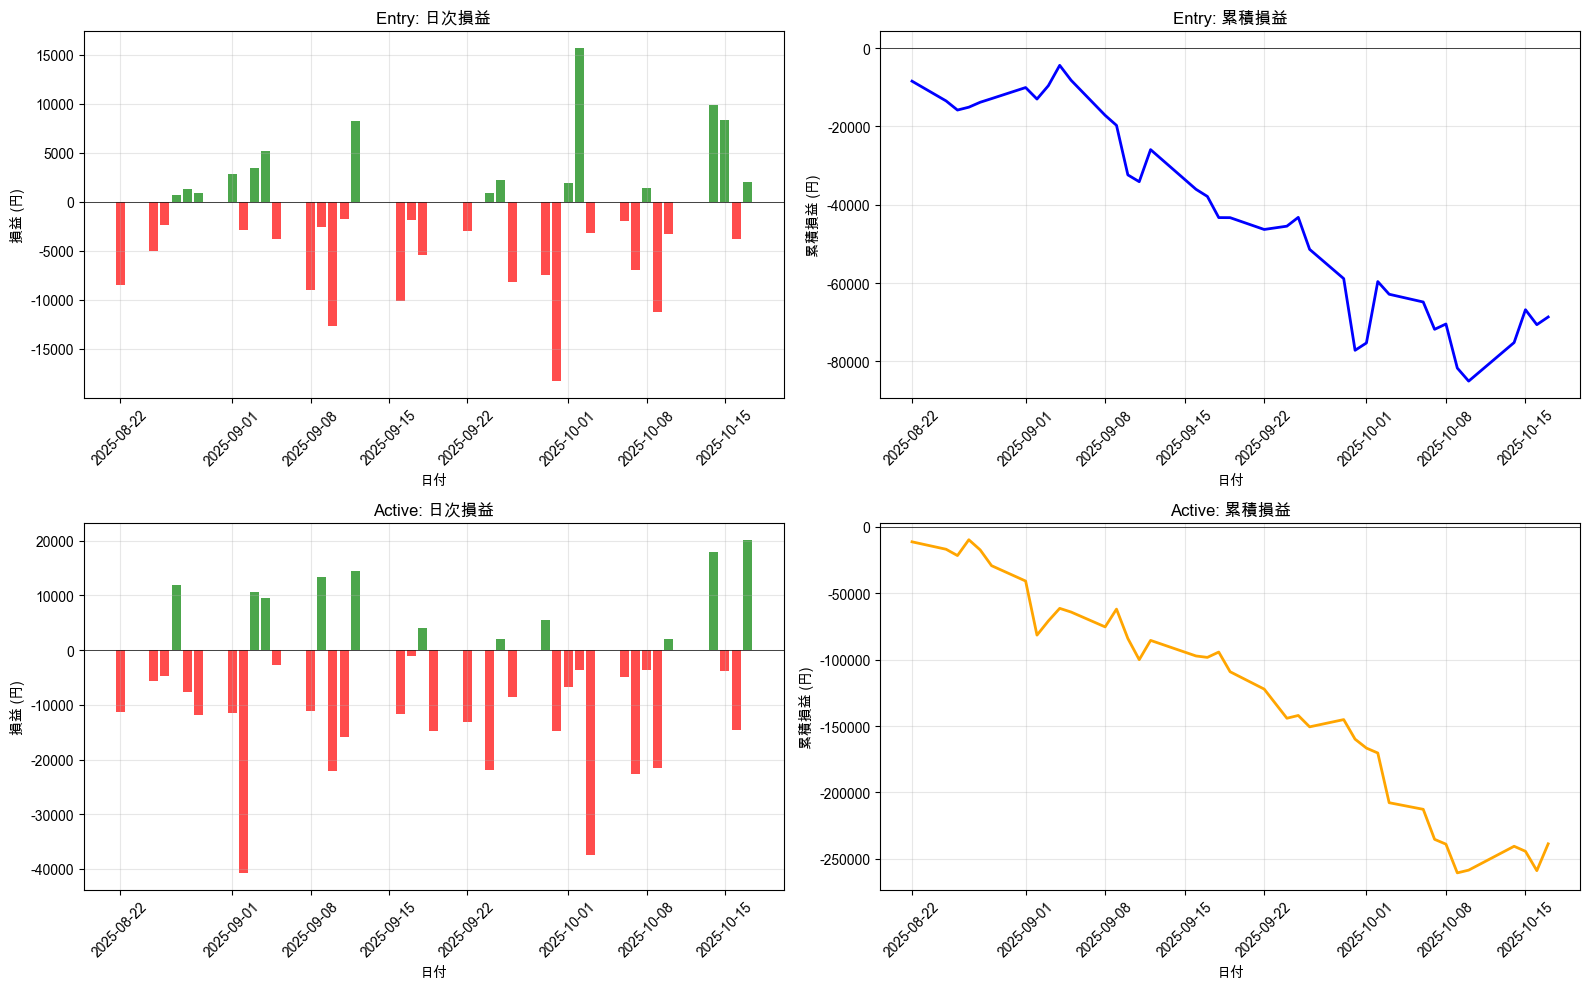

In [10]:
# „Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÁµêÊûú„ÅÆÂèØË¶ñÂåñ
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Entry: Êó•Ê¨°ÊêçÁõä
ax = axes[0, 0]
colors = ['green' if p > 0 else 'red' for p in df_entry_results['profit']]
ax.bar(df_entry_results['date'], df_entry_results['profit'], color=colors, alpha=0.7)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_title('Entry: Êó•Ê¨°ÊêçÁõä')
ax.set_xlabel('Êó•‰ªò')
ax.set_ylabel('ÊêçÁõä (ÂÜÜ)')
ax.grid(True, alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Entry: Á¥ØÁ©çÊêçÁõä
ax = axes[0, 1]
cumulative = df_entry_results['profit'].cumsum()
ax.plot(df_entry_results['date'], cumulative, linewidth=2, color='blue')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_title('Entry: Á¥ØÁ©çÊêçÁõä')
ax.set_xlabel('Êó•‰ªò')
ax.set_ylabel('Á¥ØÁ©çÊêçÁõä (ÂÜÜ)')
ax.grid(True, alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Active: Êó•Ê¨°ÊêçÁõä
ax = axes[1, 0]
colors = ['green' if p > 0 else 'red' for p in df_active_results['profit']]
ax.bar(df_active_results['date'], df_active_results['profit'], color=colors, alpha=0.7)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_title('Active: Êó•Ê¨°ÊêçÁõä')
ax.set_xlabel('Êó•‰ªò')
ax.set_ylabel('ÊêçÁõä (ÂÜÜ)')
ax.grid(True, alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Active: Á¥ØÁ©çÊêçÁõä
ax = axes[1, 1]
cumulative = df_active_results['profit'].cumsum()
ax.plot(df_active_results['date'], cumulative, linewidth=2, color='orange')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_title('Active: Á¥ØÁ©çÊêçÁõä')
ax.set_xlabel('Êó•‰ªò')
ax.set_ylabel('Á¥ØÁ©çÊêçÁõä (ÂÜÜ)')
ax.grid(True, alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## 4. Áõ∏Èñ¢ÂàÜÊûêÔºàÊåáÊ®ô„ÅÆÊúâÂäπÊÄßÊ§úË®ºÔºâ

In [11]:
# EntryÂÄôË£ú„ÅÆÂãù„Å°/Ë≤†„ÅëÂàÜÊûê
df_entry_win = df_entry_bt[df_entry_bt['next_day_return'] > 0].copy()
df_entry_lose = df_entry_bt[df_entry_bt['next_day_return'] <= 0].copy()

print("### Entry: ÂÑ≤„Åã„Å£„Åü vs Êêç„Åó„ÅüÈäòÊüÑ„ÅÆÊåáÊ®ôÊØîËºÉ")
print("ÊåáÊ®ô | ÂÑ≤„Åã„Å£„ÅüÂπ≥Âùá | Êêç„Åó„ÅüÂπ≥Âùá | Â∑ÆÂàÜ")
print("-" * 60)

indicators = ['change_pct', 'atr14_pct', 'rsi14', 'vol_ratio', 'entry_score']
for ind in indicators:
    if ind in df_entry_bt.columns:
        win_mean = df_entry_win[ind].mean()
        lose_mean = df_entry_lose[ind].mean()
        diff = win_mean - lose_mean
        print(f"{ind:15s} | {win_mean:12.2f} | {lose_mean:11.2f} | {diff:+7.2f}")

### Entry: ÂÑ≤„Åã„Å£„Åü vs Êêç„Åó„ÅüÈäòÊüÑ„ÅÆÊåáÊ®ôÊØîËºÉ
ÊåáÊ®ô | ÂÑ≤„Åã„Å£„ÅüÂπ≥Âùá | Êêç„Åó„ÅüÂπ≥Âùá | Â∑ÆÂàÜ
------------------------------------------------------------
change_pct      |        -0.14 |       -0.02 |   -0.13
atr14_pct       |         2.01 |        2.02 |   -0.00
rsi14           |        46.29 |       50.19 |   -3.90
vol_ratio       |       105.09 |      106.97 |   -1.88
entry_score     |        69.61 |       67.35 |   +2.27


In [12]:
# Entry: Áõ∏Èñ¢‰øÇÊï∞Ë®àÁÆó
print("\n### Entry: ÂêÑÊåáÊ®ô„Å®ÁøåÊó•„É™„Çø„Éº„É≥„ÅÆÁõ∏Èñ¢‰øÇÊï∞")
print("ÊåáÊ®ô | Áõ∏Èñ¢‰øÇÊï∞")
print("-" * 40)

for ind in indicators:
    if ind in df_entry_bt.columns:
        corr = df_entry_bt[[ind, 'next_day_return']].corr().iloc[0, 1]
        print(f"{ind:15s} | {corr:+8.4f}")


### Entry: ÂêÑÊåáÊ®ô„Å®ÁøåÊó•„É™„Çø„Éº„É≥„ÅÆÁõ∏Èñ¢‰øÇÊï∞
ÊåáÊ®ô | Áõ∏Èñ¢‰øÇÊï∞
----------------------------------------
change_pct      |  -0.0730
atr14_pct       |  -0.0336
rsi14           |  -0.1003
vol_ratio       |  -0.0021
entry_score     |  +0.0718


In [13]:
# Entry: overall_ratingÂà•„ÅÆÂãùÁéáÂàÜÊûê
if 'overall_rating' in df_entry_bt.columns:
    print("\n### Entry: overall_ratingÂà•„ÅÆÂãùÁéá")
    for rating in sorted(df_entry_bt['overall_rating'].unique()):
        subset = df_entry_bt[df_entry_bt['overall_rating'] == rating]
        if len(subset) > 0:
            win_rate = (subset['next_day_return'] > 0).sum() / len(subset) * 100
            avg_return = subset['next_day_return'].mean()
            print(f"{rating:15s}: ÂãùÁéá{win_rate:5.1f}% (n={len(subset):3d}), Âπ≥Âùá„É™„Çø„Éº„É≥{avg_return:+6.2f}%")


### Entry: overall_ratingÂà•„ÅÆÂãùÁéá
‰∏≠Á´ã             : ÂãùÁéá 43.7% (n=1134), Âπ≥Âùá„É™„Çø„Éº„É≥ -0.12%
Ë≤∑„ÅÑ             : ÂãùÁéá 63.2% (n= 38), Âπ≥Âùá„É™„Çø„Éº„É≥ +0.07%


In [14]:
# ActiveÂÄôË£ú„ÅÆÂãù„Å°/Ë≤†„ÅëÂàÜÊûê
df_active_win = df_active_bt[df_active_bt['next_day_return'] > 0].copy()
df_active_lose = df_active_bt[df_active_bt['next_day_return'] <= 0].copy()

print("### Active: ÂÑ≤„Åã„Å£„Åü vs Êêç„Åó„ÅüÈäòÊüÑ„ÅÆÊåáÊ®ôÊØîËºÉ")
print("ÊåáÊ®ô | ÂÑ≤„Åã„Å£„ÅüÂπ≥Âùá | Êêç„Åó„ÅüÂπ≥Âùá | Â∑ÆÂàÜ")
print("-" * 60)

indicators_active = ['change_pct', 'atr14_pct', 'rsi14', 'vol_ratio', 'active_score']
for ind in indicators_active:
    if ind in df_active_bt.columns:
        win_mean = df_active_win[ind].mean()
        lose_mean = df_active_lose[ind].mean()
        diff = win_mean - lose_mean
        print(f"{ind:15s} | {win_mean:12.2f} | {lose_mean:11.2f} | {diff:+7.2f}")

### Active: ÂÑ≤„Åã„Å£„Åü vs Êêç„Åó„ÅüÈäòÊüÑ„ÅÆÊåáÊ®ôÊØîËºÉ
ÊåáÊ®ô | ÂÑ≤„Åã„Å£„ÅüÂπ≥Âùá | Êêç„Åó„ÅüÂπ≥Âùá | Â∑ÆÂàÜ
------------------------------------------------------------
change_pct      |        -1.13 |       -0.13 |   -1.00
atr14_pct       |         7.24 |        7.21 |   +0.03
rsi14           |        46.79 |       50.54 |   -3.75
vol_ratio       |       145.12 |      164.44 |  -19.32
active_score    |        69.70 |       71.59 |   -1.89


In [15]:
# Active: Áõ∏Èñ¢‰øÇÊï∞Ë®àÁÆó
print("\n### Active: ÂêÑÊåáÊ®ô„Å®ÁøåÊó•„É™„Çø„Éº„É≥„ÅÆÁõ∏Èñ¢‰øÇÊï∞")
print("ÊåáÊ®ô | Áõ∏Èñ¢‰øÇÊï∞")
print("-" * 40)

for ind in indicators_active:
    if ind in df_active_bt.columns:
        corr = df_active_bt[[ind, 'next_day_return']].corr().iloc[0, 1]
        print(f"{ind:15s} | {corr:+8.4f}")


### Active: ÂêÑÊåáÊ®ô„Å®ÁøåÊó•„É™„Çø„Éº„É≥„ÅÆÁõ∏Èñ¢‰øÇÊï∞
ÊåáÊ®ô | Áõ∏Èñ¢‰øÇÊï∞
----------------------------------------
change_pct      |  -0.1441
atr14_pct       |  -0.0735
rsi14           |  -0.1201
vol_ratio       |  -0.0892
active_score    |  -0.1048


## 5. Top15ÈäòÊüÑ„ÅÆË©≥Á¥∞ÂàÜÊûêÔºàyfinance 5ÂàÜË∂≥Ôºâ

In [16]:
# ÊúÄÊñ∞Êó•„ÅÆTop15ÈäòÊüÑ„ÇíÂèñÂæó
latest_date = df['date'].max()
df_latest = df[df['date'] == latest_date].copy()

# Entry Top15
df_entry_top15 = df_latest[df_latest['entry_filter_passed'] == True].nsmallest(15, 'entry_rank')
entry_tickers = df_entry_top15['ticker'].tolist()

# Active Top15
df_active_top15 = df_latest[df_latest['active_filter_passed'] == True].nsmallest(15, 'active_rank')
active_tickers = df_active_top15['ticker'].tolist()

print(f"ÂàÜÊûêÂØæË±°Êó•: {latest_date.strftime('%Y-%m-%d')}")
print(f"\nEntry Top15: {len(entry_tickers)}ÈäòÊüÑ")
for i, ticker in enumerate(entry_tickers, 1):
    stock_name = df_entry_top15[df_entry_top15['ticker'] == ticker]['stock_name'].iloc[0] if 'stock_name' in df_entry_top15.columns else ''
    print(f"  {i:2d}. {ticker:6s} {stock_name}")

print(f"\nActive Top15: {len(active_tickers)}ÈäòÊüÑ")
for i, ticker in enumerate(active_tickers, 1):
    stock_name = df_active_top15[df_active_top15['ticker'] == ticker]['stock_name'].iloc[0] if 'stock_name' in df_active_top15.columns else ''
    print(f"  {i:2d}. {ticker:6s} {stock_name}")

# ÈáçË§áÈô§Âéª„Åó„ÅüÂàÜÊûêÂØæË±°ÈäòÊüÑ
all_tickers = list(set(entry_tickers + active_tickers))
print(f"\nÂêàË®à„É¶„Éã„Éº„ÇØÈäòÊüÑÊï∞: {len(all_tickers)}")

ÂàÜÊûêÂØæË±°Êó•: 2025-10-20

Entry Top15: 15ÈäòÊüÑ
   1. 1332.T „Éã„ÉÉ„Çπ„Ç§
   2. 197A.T „Çø„Ç¶„É≥„Ç∫
   3. 2170.T „É™„É≥„ÇØ„Ç¢„É≥„Éâ„É¢„ÉÅ„Éô„Éº„Ç∑„Éß„É≥
   4. 268A.T „É™„Ç¨„ÇØ„Éª„Éõ„Éº„É´„Éá„Ç£„É≥„Ç∞„Çπ
   5. 2749.T Ôº™Ôº∞„Éõ„Éº„É´„Éá„Ç£„É≥„Ç∞„Çπ
   6. 3401.T Â∏ù‰∫∫
   7. 3665.T „Ç®„Éã„Ç∞„É¢
   8. 3900.T „ÇØ„É©„Ç¶„Éâ„ÉØ„Éº„ÇØ„Çπ
   9. 3962.T „ÉÅ„Çß„É≥„Ç∏„Éõ„Éº„É´„Éá„Ç£„É≥„Ç∞„Çπ
  10. 4095.T Êó•Êú¨„Éë„Éº„Ç´„É©„Ç§„Ç∏„É≥„Ç∞
  11. 4974.T „Çø„Ç´„É©„Éê„Ç§„Ç™
  12. 6472.T ÔºÆÔº¥ÔºÆ
  13. 6473.T „Ç∏„Çß„Ç§„ÉÜ„ÇØ„Éà
  14. 6768.T „Çø„É†„É©Ë£Ω‰ΩúÊâÄ
  15. 6962.T Â§ßÁúüÁ©∫

Active Top15: 15ÈäòÊüÑ
   1. 1384.T „Éõ„ÇØ„É™„É®„Ç¶
   2. 1852.T Ê∑∫Ê≤ºÁµÑ
   3. 186A.T „Ç¢„Çπ„Éà„É≠„Çπ„Ç±„Éº„É´„Éõ„Éº„É´„Éá„Ç£„É≥„Ç∞„Çπ
   4. 1968.T Â§™Âπ≥ÈõªÊ•≠
   5. 206A.T Ôº∞Ôº≤Ôº©Ôº≥Ôº≠„ÄÄÔº¢ÔΩâÔΩèÔº¨ÔΩÅÔΩÇ
   6. 2158.T Ôº¶Ôº≤ÔºØÔºÆÔº¥Ôº•ÔºØ
   7. 2164.T Âú∞ÂüüÊñ∞ËÅûÁ§æ
   8. 218A.T Ôº¨ÔΩâÔΩÇÔΩÖÔΩíÔΩÅÔΩóÔΩÅÔΩíÔΩÖ
   9. 265A.T Ôº®ÔΩçÔΩÉÔΩèÔΩçÔΩç
  10. 268A.T „É™„Ç¨„ÇØ„Éª„Éõ„Éº„É´„Éá„Ç£„É≥„Ç∞„Çπ
  11. 2743.T „Éî„ÇØ„Çª„É´„

In [17]:
# yfinance 5ÂàÜË∂≥„Éá„Éº„ÇøÂèñÂæóÈñ¢Êï∞
def fetch_intraday_data(ticker, period='60d'):
    """
    yfinance„Åã„Çâ5ÂàÜË∂≥„Éá„Éº„ÇøÂèñÂæó
    Êù±Ë®ºÈäòÊüÑ„ÅÆ„ÉÜ„Ç£„ÉÉ„Ç´„Éº„Éï„Ç©„Éº„Éû„ÉÉ„Éà„ÇíÂá¶ÁêÜ
    """
    try:
        # „ÉÜ„Ç£„ÉÉ„Ç´„Éº„ÅåÊó¢„Å´.T„ÅßÁµÇ„Çè„Å£„Å¶„ÅÑ„ÇãÂ†¥Âêà„ÅØËøΩÂä†„Åó„Å™„ÅÑ
        if ticker.endswith('.T'):
            symbol = ticker
        else:
            symbol = f"{ticker}.T"
        
        # yfinance download (MultiIndexÂØæÂøú)
        df = yf.download(symbol, interval='5m', period=period, progress=False)
        
        if df.empty:
            print(f"  ‚ö†Ô∏è  {ticker}: „Éá„Éº„ÇøÂèñÂæóÂ§±ÊïóÔºàÈäòÊüÑ„ÅåÂ≠òÂú®„Åó„Å™„ÅÑ„Åã‰∏äÂ†¥ÂªÉÊ≠¢„ÅÆÂèØËÉΩÊÄßÔºâ")
            return None
        
        # MultiIndexÂØæÂøúÔºàË§áÊï∞ÈäòÊüÑÂêåÊôÇÂèñÂæóÊôÇÔºâ
        if isinstance(df.columns, pd.MultiIndex):
            df.columns = df.columns.droplevel(1)
        
        # „Çø„Ç§„É†„Çæ„Éº„É≥Â§âÊèõÔºàÊó•Êú¨ÊôÇÈñìÔºâ
        if df.index.tz is not None:
            df.index = df.index.tz_convert('Asia/Tokyo')
        elif df.index.tz is None:
            # „Çø„Ç§„É†„Çæ„Éº„É≥ÊÉÖÂ†±„Åå„Å™„ÅÑÂ†¥Âêà„ÅØUTC„Å®„Åó„Å¶Êâ±„ÅÑ„ÄÅÊó•Êú¨ÊôÇÈñì„Å´Â§âÊèõ
            df.index = df.index.tz_localize('UTC').tz_convert('Asia/Tokyo')
        
        # ÂèñÂºïÊôÇÈñì„ÅÆ„ÅøÊäΩÂá∫Ôºà9:00-15:00Ôºâ
        df = df.between_time('09:00', '15:00')
        
        if len(df) > 0:
            print(f"  ‚úì  {ticker}: {len(df)}Êú¨ÂèñÂæó ({df.index[0].date()} ÔΩû {df.index[-1].date()})")
            return df
        else:
            print(f"  ‚ö†Ô∏è  {ticker}: ÂèñÂºïÊôÇÈñìÂÜÖ„ÅÆ„Éá„Éº„Çø„Å™„Åó")
            return None
    
    except Exception as e:
        print(f"  ‚úó  {ticker}: „Ç®„É©„Éº - {e}")
        return None

# Top15ÈäòÊüÑ„ÅÆ5ÂàÜË∂≥„Éá„Éº„ÇøÂèñÂæó
print("yfinance 5ÂàÜË∂≥„Éá„Éº„ÇøÂèñÂæó‰∏≠...")
print("=" * 60)

intraday_data = {}
for ticker in all_tickers:
    df_5min = fetch_intraday_data(ticker)
    if df_5min is not None:
        intraday_data[ticker] = df_5min

print("=" * 60)
print(f"ÂèñÂæóÊàêÂäü: {len(intraday_data)} / {len(all_tickers)} ÈäòÊüÑ")

if len(intraday_data) == 0:
    print("\\n‚ö†Ô∏è  ÂÆüÂú®„Åô„ÇãÈäòÊüÑ„Éá„Éº„Çø„ÅåÂèñÂæó„Åß„Åç„Åæ„Åõ„Çì„Åß„Åó„Åü„ÄÇ")
    print("   „É¢„ÉÉ„ÇØ„Éá„Éº„Çø„ÅÆÈäòÊüÑ„Ç≥„Éº„Éâ„ÅåÂÆüÂú®„Åó„Å™„ÅÑ„Åã„ÄÅ‰∏äÂ†¥ÂªÉÊ≠¢„ÅÆÂèØËÉΩÊÄß„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ")

yfinance 5ÂàÜË∂≥„Éá„Éº„ÇøÂèñÂæó‰∏≠...


  ‚úì  197A.T: 3468Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  1384.T: 2702Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  3132.T: 3671Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  3665.T: 2847Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  268A.T: 3639Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  2158.T: 3541Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  3962.T: 3658Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  3652.T: 2068Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  6962.T: 3185Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  3185.T: 2882Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  265A.T: 3267Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  4095.T: 3438Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  206A.T: 2256Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  2743.T: 3571Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  3401.T: 3673Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  186A.T: 3612Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  2749.T: 3438Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  6768.T: 3335Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  1332.T: 3667Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  218A.T: 3661Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  2170.T: 3317Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  4974.T: 3495Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  2164.T: 2291Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  1852.T: 3484Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  6472.T: 3660Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  2776.T: 2750Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  3900.T: 3266Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  6473.T: 3652Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)


  ‚úì  1968.T: 3039Êú¨ÂèñÂæó (2025-07-23 ÔΩû 2025-10-20)
ÂèñÂæóÊàêÂäü: 29 / 29 ÈäòÊüÑ


In [18]:
# ÊôÇÈñìÂ∏ØÂà•„Éë„Éï„Ç©„Éº„Éû„É≥„ÇπÂàÜÊûê
def analyze_intraday_performance(intraday_data):
    """
    ÊôÇÈñìÂ∏ØÂà•„ÅÆ„É™„Çø„Éº„É≥ÂàÜÊûê
    - ÂØÑ‰ªòÔºà9:00-9:30ÔºâË≤∑„ÅÑ ‚Üí ÂêÑÊôÇÈñìÂ∏ØÂ£≤„Çä„ÅÆ„Éë„Éï„Ç©„Éº„Éû„É≥„Çπ
    """
    results = []
    
    for ticker, df_5min in intraday_data.items():
        # Êó•Âà•„Å´ÂàÜÊûê
        for date in df_5min.index.date:
            df_day = df_5min[df_5min.index.date == date]
            
            if len(df_day) == 0:
                continue
            
            # ÂØÑ‰ªò‰æ°Ê†ºÔºà9:00-9:30„ÅÆÂπ≥ÂùáÔºâ
            df_open = df_day.between_time('09:00', '09:30')
            if len(df_open) == 0:
                continue
            open_price = df_open['Close'].mean()
            
            # ÂêÑÊôÇÈñìÂ∏Ø„ÅÆ‰æ°Ê†º
            time_slots = [
                ('10:00', '10:30', 'ÂâçÂ†¥‰∏≠Áõ§'),
                ('11:00', '11:30', 'ÂâçÂ†¥ÁµÇÁõ§'),
                ('12:30', '13:00', 'ÂæåÂ†¥ÈñãÂßã'),
                ('14:00', '14:30', 'ÂæåÂ†¥‰∏≠Áõ§'),
                ('14:30', '15:00', 'Â§ßÂºï„Åë')
            ]
            
            for start_time, end_time, label in time_slots:
                df_slot = df_day.between_time(start_time, end_time)
                if len(df_slot) > 0:
                    sell_price = df_slot['Close'].mean()
                    return_pct = (sell_price - open_price) / open_price * 100
                    
                    results.append({
                        'ticker': ticker,
                        'date': date,
                        'sell_time': label,
                        'open_price': open_price,
                        'sell_price': sell_price,
                        'return_pct': return_pct
                    })
    
    return pd.DataFrame(results)

# ÂàÜÊûêÂÆüË°å
print("ÊôÇÈñìÂ∏ØÂà•„Éë„Éï„Ç©„Éº„Éû„É≥„ÇπÂàÜÊûê‰∏≠...")
df_intraday_perf = analyze_intraday_performance(intraday_data)
print(f"ÂàÜÊûêÂÆå‰∫Ü: {len(df_intraday_perf)}‰ª∂„ÅÆ„Éá„Éº„Çø„Éù„Ç§„É≥„Éà")

ÊôÇÈñìÂ∏ØÂà•„Éë„Éï„Ç©„Éº„Éû„É≥„ÇπÂàÜÊûê‰∏≠...


ÂàÜÊûêÂÆå‰∫Ü: 465978‰ª∂„ÅÆ„Éá„Éº„Çø„Éù„Ç§„É≥„Éà


### ÊôÇÈñìÂ∏ØÂà•Âπ≥Âùá„É™„Çø„Éº„É≥ÔºàÂØÑ‰ªòË≤∑„ÅÑ ‚Üí ÂêÑÊôÇÈñìÂ∏ØÂ£≤„ÇäÔºâ


Âπ≥Âùá„É™„Çø„Éº„É≥(%)  Ê®ôÊ∫ñÂÅèÂ∑Æ(%)  „Çµ„É≥„Éó„É´Êï∞
sell_time                           
ÂâçÂ†¥‰∏≠Áõ§            0.04     1.32  93262
ÂâçÂ†¥ÁµÇÁõ§           -0.01     1.71  92970
ÂæåÂ†¥ÈñãÂßã           -0.03     1.85  93313
ÂæåÂ†¥‰∏≠Áõ§           -0.02     2.21  93207
Â§ßÂºï„Åë            -0.04     2.36  93226

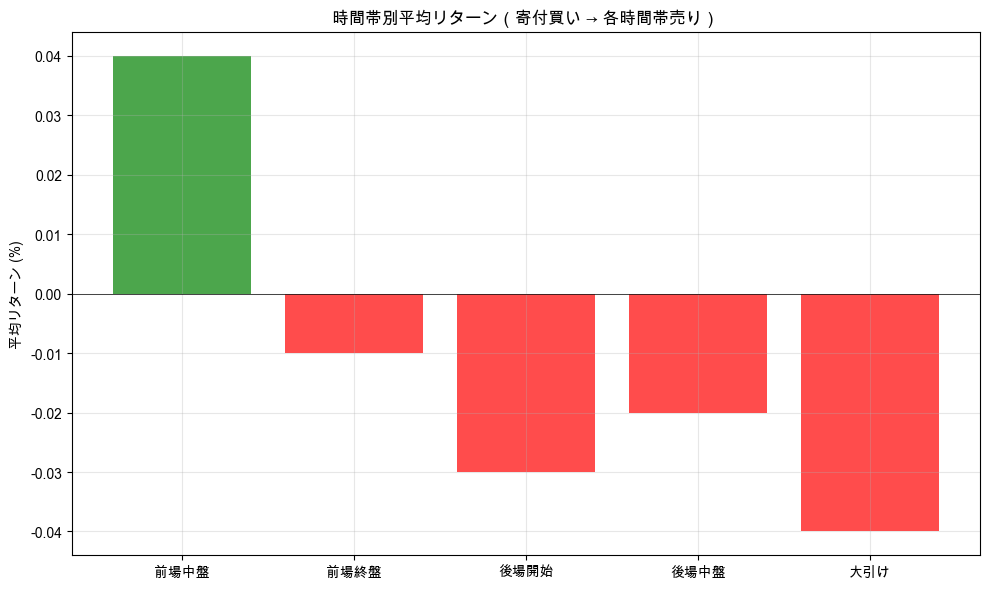


### ÊôÇÈñìÂ∏ØÂà•ÂãùÁéá
ÂâçÂ†¥‰∏≠Áõ§      :  53.0% (n=93262)
ÂâçÂ†¥ÁµÇÁõ§      :  50.9% (n=92970)
ÂæåÂ†¥ÈñãÂßã      :  49.5% (n=93313)
ÂæåÂ†¥‰∏≠Áõ§      :  48.8% (n=93207)
Â§ßÂºï„Åë       :  49.1% (n=93226)


In [19]:
# ÊôÇÈñìÂ∏ØÂà•„ÅÆÂπ≥Âùá„É™„Çø„Éº„É≥
if len(df_intraday_perf) > 0:
    print("### ÊôÇÈñìÂ∏ØÂà•Âπ≥Âùá„É™„Çø„Éº„É≥ÔºàÂØÑ‰ªòË≤∑„ÅÑ ‚Üí ÂêÑÊôÇÈñìÂ∏ØÂ£≤„ÇäÔºâ")
    print("=" * 60)
    
    summary = df_intraday_perf.groupby('sell_time').agg({
        'return_pct': ['mean', 'std', 'count'],
    }).round(2)
    
    summary.columns = ['Âπ≥Âùá„É™„Çø„Éº„É≥(%)', 'Ê®ôÊ∫ñÂÅèÂ∑Æ(%)', '„Çµ„É≥„Éó„É´Êï∞']
    
    # ÊôÇÈñìÂ∏Ø„ÅÆÈ†ÜÂ∫è„Çí‰øùÊåÅ
    time_order = ['ÂâçÂ†¥‰∏≠Áõ§', 'ÂâçÂ†¥ÁµÇÁõ§', 'ÂæåÂ†¥ÈñãÂßã', 'ÂæåÂ†¥‰∏≠Áõ§', 'Â§ßÂºï„Åë']
    summary = summary.reindex(time_order)
    
    display(summary)
    
    # ÂèØË¶ñÂåñ
    fig, ax = plt.subplots(figsize=(10, 6))
    x = range(len(summary))
    ax.bar(x, summary['Âπ≥Âùá„É™„Çø„Éº„É≥(%)'], color=['green' if v > 0 else 'red' for v in summary['Âπ≥Âùá„É™„Çø„Éº„É≥(%)']], alpha=0.7)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax.set_xticks(x)
    ax.set_xticklabels(summary.index)
    ax.set_ylabel('Âπ≥Âùá„É™„Çø„Éº„É≥ (%)')
    ax.set_title('ÊôÇÈñìÂ∏ØÂà•Âπ≥Âùá„É™„Çø„Éº„É≥ÔºàÂØÑ‰ªòË≤∑„ÅÑ ‚Üí ÂêÑÊôÇÈñìÂ∏ØÂ£≤„ÇäÔºâ')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # ÂãùÁéá„ÇÇË°®Á§∫
    print("\n### ÊôÇÈñìÂ∏ØÂà•ÂãùÁéá")
    for time_slot in time_order:
        subset = df_intraday_perf[df_intraday_perf['sell_time'] == time_slot]
        if len(subset) > 0:
            win_rate = (subset['return_pct'] > 0).sum() / len(subset) * 100
            print(f"{time_slot:10s}: {win_rate:5.1f}% (n={len(subset)})")

else:
    print("‚ö†Ô∏è ÂàÜÊûê„Éá„Éº„Çø„Åå‰∏çË∂≥„Åó„Å¶„ÅÑ„Åæ„Åô")

## 6. Á∑èÂêàÁµêË´ñÔºà„ÉÅ„É£„ÉÉ„ÉàË≤º„Çä‰ªò„ÅëÁî®Ôºâ

In [20]:
print("=" * 80)
print("„Çπ„Ç≠„É£„É´„Éî„É≥„Ç∞ÈäòÊüÑÈÅ∏ÂÆö Á∑èÂêàÂàÜÊûêÁµêÊûú")
print("=" * 80)

# 1. „Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÁµêÊûú„Çµ„Éû„É™„Éº
print("\n### 1. Êó•Ë∂≥„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÁµêÊûú")
print("-" * 80)
print("\n[EntryÊà¶Áï•]")
print(f"  ÂèñÂºïÊó•Êï∞: {len(df_entry_results)}Êó•")
print(f"  Á∑èÂà©Áõä: ¬•{df_entry_results['profit'].sum():,.0f}")
print(f"  Âπ≥ÂùáÊó•Ê¨°Âà©Áõä: ¬•{df_entry_results['profit'].mean():,.0f}")
print(f"  Âπ≥Âùá„É™„Çø„Éº„É≥: {df_entry_results['return_pct'].mean():.2f}%")
print(f"  ÂãùÁéá: {df_entry_results['win_rate'].mean():.1f}%")
print(f"  Âãù„Å°Êó•Êï∞/Ë≤†„ÅëÊó•Êï∞: {(df_entry_results['profit'] > 0).sum()} / {(df_entry_results['profit'] <= 0).sum()}")

print("\n[ActiveÊà¶Áï•]")
print(f"  ÂèñÂºïÊó•Êï∞: {len(df_active_results)}Êó•")
print(f"  Á∑èÂà©Áõä: ¬•{df_active_results['profit'].sum():,.0f}")
print(f"  Âπ≥ÂùáÊó•Ê¨°Âà©Áõä: ¬•{df_active_results['profit'].mean():,.0f}")
print(f"  Âπ≥Âùá„É™„Çø„Éº„É≥: {df_active_results['return_pct'].mean():.2f}%")
print(f"  ÂãùÁéá: {df_active_results['win_rate'].mean():.1f}%")
print(f"  Âãù„Å°Êó•Êï∞/Ë≤†„ÅëÊó•Êï∞: {(df_active_results['profit'] > 0).sum()} / {(df_active_results['profit'] <= 0).sum()}")

# 2. Áõ∏Èñ¢ÂàÜÊûêÁµêÊûú
print("\n### 2. Áõ∏Èñ¢ÂàÜÊûêÁµêÊûúÔºàÂêÑÊåáÊ®ô„Å®ÁøåÊó•„É™„Çø„Éº„É≥„ÅÆÁõ∏Èñ¢‰øÇÊï∞Ôºâ")
print("-" * 80)
print("\n[EntryÊà¶Áï•]")
print("ÊåáÊ®ô           | Áõ∏Èñ¢‰øÇÊï∞ | Ë©ï‰æ°")
print("-" * 50)
for ind in indicators:
    if ind in df_entry_bt.columns:
        corr = df_entry_bt[[ind, 'next_day_return']].corr().iloc[0, 1]
        evaluation = "‚úÖ Ê≠£„ÅÆÁõ∏Èñ¢" if corr > 0.05 else "‚ùå Ë≤†„ÅÆÁõ∏Èñ¢" if corr < -0.05 else "‚ö†Ô∏è  ÂäπÊûú„Å™„Åó"
        print(f"{ind:15s} | {corr:+8.4f} | {evaluation}")

print("\n[ActiveÊà¶Áï•]")
print("ÊåáÊ®ô           | Áõ∏Èñ¢‰øÇÊï∞ | Ë©ï‰æ°")
print("-" * 50)
for ind in indicators_active:
    if ind in df_active_bt.columns:
        corr = df_active_bt[[ind, 'next_day_return']].corr().iloc[0, 1]
        evaluation = "‚úÖ Ê≠£„ÅÆÁõ∏Èñ¢" if corr > 0.05 else "‚ùå Ë≤†„ÅÆÁõ∏Èñ¢" if corr < -0.05 else "‚ö†Ô∏è  ÂäπÊûú„Å™„Åó"
        print(f"{ind:15s} | {corr:+8.4f} | {evaluation}")

# 3. ÊôÇÈñìÂ∏ØÂà•„Éë„Éï„Ç©„Éº„Éû„É≥„Çπ
if len(df_intraday_perf) > 0:
    print("\n### 3. ÊôÇÈñìÂ∏ØÂà•„Éë„Éï„Ç©„Éº„Éû„É≥„ÇπÔºàÂØÑ‰ªòË≤∑„ÅÑ ‚Üí ÂêÑÊôÇÈñìÂ∏ØÂ£≤„ÇäÔºâ")
    print("-" * 80)
    time_order = ['ÂâçÂ†¥‰∏≠Áõ§', 'ÂâçÂ†¥ÁµÇÁõ§', 'ÂæåÂ†¥ÈñãÂßã', 'ÂæåÂ†¥‰∏≠Áõ§', 'Â§ßÂºï„Åë']
    for time_slot in time_order:
        subset = df_intraday_perf[df_intraday_perf['sell_time'] == time_slot]
        if len(subset) > 0:
            avg_return = subset['return_pct'].mean()
            win_rate = (subset['return_pct'] > 0).sum() / len(subset) * 100
            print(f"{time_slot:10s}: Âπ≥Âùá{avg_return:+6.2f}%, ÂãùÁéá{win_rate:5.1f}% (n={len(subset)})")

# 4. ÊîπÂñÑÊèêÊ°à
print("\n### 4. ÊîπÂñÑÊèêÊ°à")
print("-" * 80)

# EntryÊà¶Áï•„ÅÆÂïèÈ°åÁÇπ
entry_score_corr = df_entry_bt[['entry_score', 'next_day_return']].corr().iloc[0, 1]
entry_rsi_corr = df_entry_bt[['rsi14', 'next_day_return']].corr().iloc[0, 1]
entry_vol_corr = df_entry_bt[['vol_ratio', 'next_day_return']].corr().iloc[0, 1]

print("\n[EntryÊà¶Áï•]")
if entry_score_corr < 0.05:
    print("  ‚ùå entry_score„ÅÆÁõ∏Èñ¢„ÅåÂº±„ÅÑ ‚Üí „Çπ„Ç≥„Ç¢„É™„É≥„Ç∞„É≠„Ç∏„ÉÉ„ÇØÂÖ®‰Ωì„ÅÆË¶ãÁõ¥„Åó„ÅåÂøÖË¶Å")
if entry_rsi_corr < -0.05:
    print("  ‚ùå RSI14„ÅåË≤†„ÅÆÁõ∏Èñ¢ ‚Üí RSI„ÅÆË©ï‰æ°ÊñπÊ≥ï„ÇíÈÄÜËª¢„Åô„Åπ„Åç")
    print("     ÊèêÊ°à: RSI 30-50ÔºàÂ£≤„Çâ„ÇåÈÅé„Åé„Åã„ÇâÂõûÂæ©Ôºâ„ÇíÈ´òË©ï‰æ°„Å´Â§âÊõ¥")
if entry_vol_corr < -0.05:
    print("  ‚ùå vol_ratio„ÅåË≤†„ÅÆÁõ∏Èñ¢ ‚Üí Âá∫Êù•È´òÊÄ•Â¢ó„ÅØÈÅø„Åë„Çã„Åπ„Åç")
if 'overall_rating' in df_entry_bt.columns:
    if df_entry_bt['overall_rating'].nunique() == 1:
        print("  ‚ö†Ô∏è  overall_rating„ÅåÂÖ®„Å¶Âêå„Åò ‚Üí Â∑ÆÂà•Âåñ„Åß„Åç„Å¶„ÅÑ„Å™„ÅÑ„ÄÅ40ÁÇπÈÖçÂàÜ„ÅåÁÑ°ÈßÑ")

# ActiveÊà¶Áï•„ÅÆÂïèÈ°åÁÇπ
active_score_corr = df_active_bt[['active_score', 'next_day_return']].corr().iloc[0, 1]
active_rsi_corr = df_active_bt[['rsi14', 'next_day_return']].corr().iloc[0, 1]
active_vol_corr = df_active_bt[['vol_ratio', 'next_day_return']].corr().iloc[0, 1]
active_change_corr = df_active_bt[['change_pct', 'next_day_return']].corr().iloc[0, 1]

print("\n[ActiveÊà¶Áï•]")
if active_score_corr < 0:
    print("  üö® active_score„ÅåË≤†„ÅÆÁõ∏Èñ¢ ‚Üí „Çπ„Ç≥„Ç¢„ÅåÈ´ò„ÅÑ„Åª„Å©Êêç„Åô„ÇãÔºàÂÆåÂÖ®„Å´ÈÄÜÔºâ")
if active_rsi_corr < -0.1:
    print("  ‚ùå RSI14„ÅåÂº∑„ÅÑË≤†„ÅÆÁõ∏Èñ¢ ‚Üí RSIÈ´ò„ÅÑ = Ë≤∑„Çè„ÇåÈÅé„Åé = Â§©‰∫ï ‚Üí ÈÅø„Åë„Çã„Åπ„Åç")
if active_vol_corr < -0.1:
    print("  ‚ùå vol_ratio„ÅåÂº∑„ÅÑË≤†„ÅÆÁõ∏Èñ¢ ‚Üí Âá∫Êù•È´òÊÄ•Â¢ó = Â§©‰∫ïÂúè ‚Üí ÈÅø„Åë„Çã„Åπ„Åç")
if active_change_corr < -0.1:
    print("  ‚ùå change_pct„ÅåË≤†„ÅÆÁõ∏Èñ¢ ‚Üí Â§ß„Åç„ÅèÂãï„ÅÑ„ÅüÊ†™ = Êó¢„Å´Â§©‰∫ï ‚Üí ÈÅø„Åë„Çã„Åπ„Åç")
    print("     ÊèêÊ°à: „Äé„Åì„Çå„Åã„ÇâÂãï„ÅèÊ†™„Äè„ÇíÈÅ∏„Å∂„É≠„Ç∏„ÉÉ„ÇØ„Å´Â§âÊõ¥ÔºàRSI‰Ωé„ÅÑ„ÄÅÂá∫Êù•È´ò„Åæ„Å†Â¢ó„Åà„Å¶„ÅÑ„Å™„ÅÑÔºâ")

print("\n### 5. Ê¨°„ÅÆ„Ç¢„ÇØ„Ç∑„Éß„É≥")
print("-" * 80)
print("  1. ÂÖ®ÈäòÊüÑ„Éá„Éº„Çø„ÅßÂêåÊßò„ÅÆÂàÜÊûê„ÇíÂÆüË°åÔºà100ÈäòÊüÑ ‚Üí 3700ÈäòÊüÑÔºâ")
print("  2. „Çπ„Ç≥„Ç¢„É™„É≥„Ç∞„É≠„Ç∏„ÉÉ„ÇØ„Çí‰øÆÊ≠£:")
print("     - RSIË©ï‰æ°„ÇíÈÄÜËª¢Ôºà30-50„ÇíÈ´òË©ï‰æ°„ÄÅ60‰ª•‰∏ä„ÇíÊ∏õÁÇπÔºâ")
print("     - overall_ratingÂâäÈô§Ôºà40ÁÇπ„Çí‰ªñÊåáÊ®ô„Å´ÂÜçÈÖçÂàÜÔºâ")
print("     - vol_ratio„ÅÆ‰Ωø„ÅÑÊñπ„ÇíË¶ãÁõ¥„ÅóÔºàActive: ÊÄ•Â¢ó„ÇíÈÅø„Åë„ÇãÔºâ")
print("     - change_pct„ÅÆ‰Ωø„ÅÑÊñπ„ÇíË¶ãÁõ¥„ÅóÔºàActive: Â§ß„Åç„ÅèÂãï„ÅÑ„ÅüÊ†™„ÇíÈÅø„Åë„ÇãÔºâ")
print("  3. ‰øÆÊ≠£Âæå„ÅÆ„É≠„Ç∏„ÉÉ„ÇØ„ÅßÂÜç„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„Éà")
print("  4. ÂãùÁéá50%Ë∂Ö„Åà„ÄÅÂπ≥Âùá„É™„Çø„Éº„É≥„Éó„É©„Çπ„ÇíÁõÆÊåá„Åô")

print("\n" + "=" * 80)
print("ÂàÜÊûêÂÆå‰∫Ü")
print("=" * 80)

„Çπ„Ç≠„É£„É´„Éî„É≥„Ç∞ÈäòÊüÑÈÅ∏ÂÆö Á∑èÂêàÂàÜÊûêÁµêÊûú

### 1. Êó•Ë∂≥„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„ÉàÁµêÊûú
--------------------------------------------------------------------------------

[EntryÊà¶Áï•]
  ÂèñÂºïÊó•Êï∞: 38Êó•
  Á∑èÂà©Áõä: ¬•-68,655
  Âπ≥ÂùáÊó•Ê¨°Âà©Áõä: ¬•-1,807
  Âπ≥Âùá„É™„Çø„Éº„É≥: -0.18%
  ÂãùÁéá: 43.0%
  Âãù„Å°Êó•Êï∞/Ë≤†„ÅëÊó•Êï∞: 15 / 23

[ActiveÊà¶Áï•]
  ÂèñÂºïÊó•Êï∞: 38Êó•
  Á∑èÂà©Áõä: ¬•-238,673
  Âπ≥ÂùáÊó•Ê¨°Âà©Áõä: ¬•-6,281
  Âπ≥Âùá„É™„Çø„Éº„É≥: -0.63%
  ÂãùÁéá: 36.7%
  Âãù„Å°Êó•Êï∞/Ë≤†„ÅëÊó•Êï∞: 11 / 27

### 2. Áõ∏Èñ¢ÂàÜÊûêÁµêÊûúÔºàÂêÑÊåáÊ®ô„Å®ÁøåÊó•„É™„Çø„Éº„É≥„ÅÆÁõ∏Èñ¢‰øÇÊï∞Ôºâ
--------------------------------------------------------------------------------

[EntryÊà¶Áï•]
ÊåáÊ®ô           | Áõ∏Èñ¢‰øÇÊï∞ | Ë©ï‰æ°
--------------------------------------------------
change_pct      |  -0.0730 | ‚ùå Ë≤†„ÅÆÁõ∏Èñ¢
atr14_pct       |  -0.0336 | ‚ö†Ô∏è  ÂäπÊûú„Å™„Åó
rsi14           |  -0.1003 | ‚ùå Ë≤†„ÅÆÁõ∏Èñ¢
vol_ratio       |  -0.0021 | ‚ö†Ô∏è  ÂäπÊûú„Å™„Åó
entry_score     |  +0

ÂæåÂ†¥‰∏≠Áõ§      : Âπ≥Âùá -0.02%, ÂãùÁéá 48.8% (n=93207)


Â§ßÂºï„Åë       : Âπ≥Âùá -0.04%, ÂãùÁéá 49.1% (n=93226)

### 4. ÊîπÂñÑÊèêÊ°à
--------------------------------------------------------------------------------

[EntryÊà¶Áï•]
  ‚ùå RSI14„ÅåË≤†„ÅÆÁõ∏Èñ¢ ‚Üí RSI„ÅÆË©ï‰æ°ÊñπÊ≥ï„ÇíÈÄÜËª¢„Åô„Åπ„Åç
     ÊèêÊ°à: RSI 30-50ÔºàÂ£≤„Çâ„ÇåÈÅé„Åé„Åã„ÇâÂõûÂæ©Ôºâ„ÇíÈ´òË©ï‰æ°„Å´Â§âÊõ¥

[ActiveÊà¶Áï•]
  üö® active_score„ÅåË≤†„ÅÆÁõ∏Èñ¢ ‚Üí „Çπ„Ç≥„Ç¢„ÅåÈ´ò„ÅÑ„Åª„Å©Êêç„Åô„ÇãÔºàÂÆåÂÖ®„Å´ÈÄÜÔºâ
  ‚ùå RSI14„ÅåÂº∑„ÅÑË≤†„ÅÆÁõ∏Èñ¢ ‚Üí RSIÈ´ò„ÅÑ = Ë≤∑„Çè„ÇåÈÅé„Åé = Â§©‰∫ï ‚Üí ÈÅø„Åë„Çã„Åπ„Åç
  ‚ùå change_pct„ÅåË≤†„ÅÆÁõ∏Èñ¢ ‚Üí Â§ß„Åç„ÅèÂãï„ÅÑ„ÅüÊ†™ = Êó¢„Å´Â§©‰∫ï ‚Üí ÈÅø„Åë„Çã„Åπ„Åç
     ÊèêÊ°à: „Äé„Åì„Çå„Åã„ÇâÂãï„ÅèÊ†™„Äè„ÇíÈÅ∏„Å∂„É≠„Ç∏„ÉÉ„ÇØ„Å´Â§âÊõ¥ÔºàRSI‰Ωé„ÅÑ„ÄÅÂá∫Êù•È´ò„Åæ„Å†Â¢ó„Åà„Å¶„ÅÑ„Å™„ÅÑÔºâ

### 5. Ê¨°„ÅÆ„Ç¢„ÇØ„Ç∑„Éß„É≥
--------------------------------------------------------------------------------
  1. ÂÖ®ÈäòÊüÑ„Éá„Éº„Çø„ÅßÂêåÊßò„ÅÆÂàÜÊûê„ÇíÂÆüË°åÔºà100ÈäòÊüÑ ‚Üí 3700ÈäòÊüÑÔºâ
  2. „Çπ„Ç≥„Ç¢„É™„É≥„Ç∞„É≠„Ç∏„ÉÉ„ÇØ„Çí‰øÆÊ≠£:
     - RSIË©ï‰æ°„ÇíÈÄÜËª¢Ôºà